# 單元5 迴歸法預測函數

我們認真的來做一下數據分析!

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 5-1 數據分析

我們在數據分析, 就是收集了歷史資料, 比如說這些數據。

In [2]:
X = np.random.randn(6)
Y = np.random.randn(6)

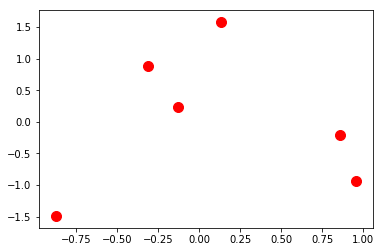

In [3]:
plt.scatter(X, Y, c='r', s=100)

我們想找一個函數, 通過越多點越好... 或是, 真的是這樣嗎?

In [4]:
X = np.random.rand(6)
Y = np.random.rand(6)

def myplot(n=1):
    plt.scatter(X, Y, c='r', s=100)
    x = np.linspace(0, 1, 1000)
    y = 0.5*np.sin(n*x) + 0.5
    plt.plot(x, y)

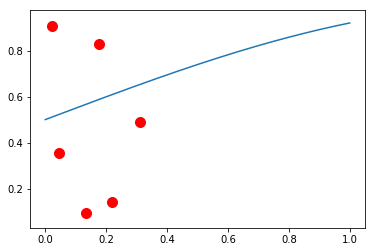

In [5]:
myplot(1)

In [6]:
from ipywidgets import interact

In [7]:
interact(myplot, n=(1., 500))

interactive(children=(FloatSlider(value=1.0, description='n', max=500.0, min=1.0), Output()), _dom_classes=('w…

<function __main__.myplot(n=1)>

學得「越像」, 不一定是越好的!

## 5-2 小試線性迴歸

#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 1000 個點 (現場建議, 雖然多了一點...)

加入 noise 項, 看來更真實
大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

𝑓(𝑥)+𝜀(𝑥)
 
也就是都有個 noise 項。

In [8]:
x = np.linspace(0, 1, 1000)

In [9]:
y = 1.2*x + 0.8 + 0.2*np.random.randn(1000)

畫出圖形來。

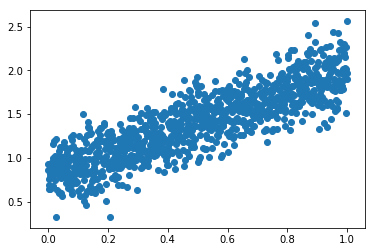

In [10]:
plt.scatter(x,y)

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.cross_validation
    
裡的

    train_test_split
    
來亂數選一定百分比的資料來用。

In [11]:
from sklearn.model_selection import train_test_split

把原來的 `x`, `y` 中的 80% 給 training data, 20% 給 testing data。

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=9487)

In [13]:
len(x_train)

800

In [14]:
len(x_test)

200

In [15]:
x_test

array([0.72972973, 0.61061061, 0.04204204, 0.26526527, 0.22122122,
       0.12712713, 0.06706707, 0.35035035, 0.00500501, 0.81881882,
       0.07207207, 0.82882883, 0.83783784, 0.12412412, 0.22422422,
       0.25625626, 0.41041041, 0.6046046 , 0.003003  , 0.16216216,
       0.56656657, 0.7957958 , 0.96396396, 0.45945946, 0.63063063,
       0.62262262, 0.75275275, 0.1991992 , 0.43743744, 0.62162162,
       0.12812813, 0.37637638, 0.63263263, 0.98998999, 0.33633634,
       0.02502503, 0.10910911, 0.77877878, 0.44544545, 0.53053053,
       0.97097097, 0.04504505, 0.66266266, 0.29329329, 0.58658659,
       1.        , 0.68968969, 0.22322322, 0.84984985, 0.36836837,
       0.81281281, 0.72272272, 0.96096096, 0.4034034 , 0.02802803,
       0.06406406, 0.3963964 , 0.15615616, 0.82282282, 0.28328328,
       0.17117117, 0.65265265, 0.42142142, 0.04004004, 0.87287287,
       0.13613614, 0.1031031 , 0.05105105, 0.37337337, 0.76676677,
       0.70770771, 0.44844845, 0.93393393, 0.24224224, 0.81381

### 【重點】注意輸入格式

只有一個 feature 時, 我們要小心的是, 很多機器學習、深度學習的套件, 都不希望我們用

$$x = [x_1, x_2, \ldots, x_n]$$

這樣子去做, 而是希望變成

$$x = [[x_1], [x_2], \ldots, [x_n]]$$

這種形式!

In [16]:
xx = np.array([3, 9, 8, 1, 2])
yy = np.array([1, 3, 9, 2, 4])

In [17]:
xx

array([3, 9, 8, 1, 2])

In [18]:
# xx = [[3], 
#      [9], 
#      [8], 
#      [1], 
#      [2]]

In [19]:
xx.shape

(5,)

In [20]:
xx.reshape(5,1)

array([[3],
       [9],
       [8],
       [1],
       [2]])

In [21]:
xx = xx.reshape(len(xx),1)

#### 正式轉我們的訓練資料

In [22]:
x_train = x_train.reshape(len(x_train),1)

In [23]:
x_test = x_test.reshape(len(x_test), 1)

### 【重點】開一台「線性迴歸機」

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regr = LinearRegression()

In [26]:
# 學習

regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# 預測

Ypred = regr.predict(x_test)

In [28]:
# x: x_test
# y: Ypred

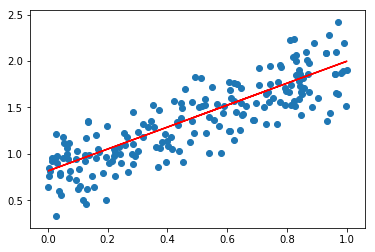

In [29]:
# x_test.ravel()

plt.plot(x_test.ravel(), Ypred, 'r')
plt.scatter(x_test.ravel(), y_test)

In [30]:
np.sum((Ypred - y_test)**2)/len(y_test)

0.05115429848039476

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
mse_t = mean_squared_error(y_train, regr.predict(x_train))
r2_t = r2_score(y_train, regr.predict(x_train))

In [33]:
print('訓練資料')
print('MSE =', mse_t)
print("R2 =", r2_t)

訓練資料
MSE = 0.040870419181394675
R2 = 0.7345183171073775


In [34]:
mse = mean_squared_error(y_test, Ypred)
r2 = r2_score(y_test, Ypred)

In [35]:
print("測試資料")
print(f"MSE = {mse:.4f}")
print(f"R2 = {r2:.4f}")


測試資料
MSE = 0.0512
R2 = 0.7186


## 5-4 房價預測

#### 讀入資料

SciKit-Learn 有許多 "Toy Datasets" 可以讓我們玩玩。

今天我們要使用的是「波士頓房價資料」。

這裡我們動用一個叫 `seaborn` 的畫圖套件, 瞬間讓我們的圖變美!

`seaborn` 和我們其他常用套件一樣也是有個標準的縮寫, 叫 `sns`。

等等, `seaborn` 怎麼縮成 `sns` 的?

原來是因為《白宮風雲》 (The West Wing) 中有位白宮的公關室副主任、副幕僚長叫 Samuel Norman Seaborn....

對, 就是 Python 向來的耍寶風格...

In [37]:
import seaborn as sns

In [38]:
from sklearn.datasets import load_boston

In [39]:
boston_dataset = load_boston()

In [40]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [41]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [42]:
boston_dataset.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [43]:
boston = pd.DataFrame(boston_dataset.data,
                     columns=boston_dataset.feature_names)

In [44]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
boston['MEDV'] = boston_dataset.target

In [46]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


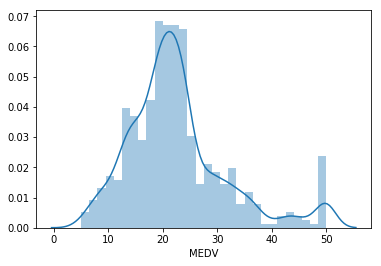

In [47]:
sns.distplot(boston.MEDV, bins=30)

In [48]:
correlation_matrix = boston.corr().round(2)

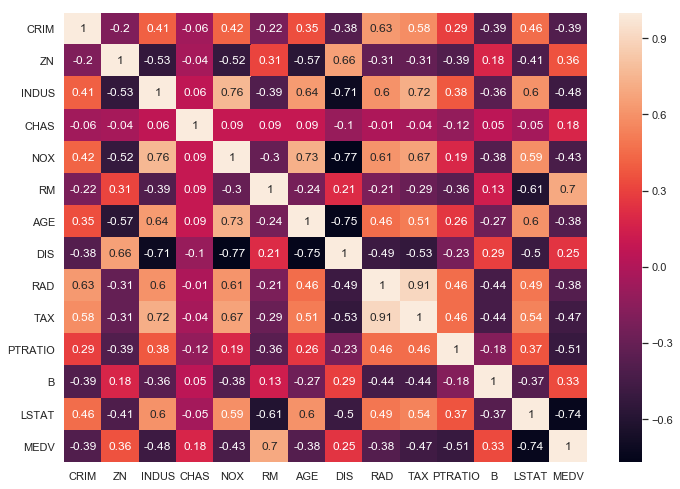

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(correlation_matrix, annot=True)

In [50]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [51]:
X = boston.loc[:,"CRIM":"LSTAT"].values
Y = boston.MEDV

In [52]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=9487)

In [53]:
regr = LinearRegression()

In [54]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
Ypred = regr.predict(x_test)

In [56]:
mse = mean_squared_error(y_test, Ypred)
r2 = r2_score(y_test, Ypred)

print("MSE =", mse)
print("R2 =", r2)

MSE = 23.62871172175499
R2 = 0.7432212177482068


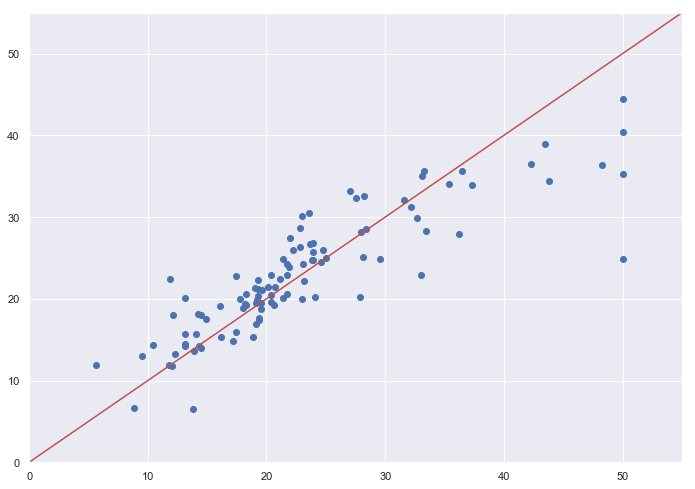

In [57]:
plt.scatter(y_test, Ypred)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0,55],[0,55],'r')

In [131]:
X = boston[['NOX', 'AGE', 'DIS']].values

In [134]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [135]:
X = boston[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']].values

In [136]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [137]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=9487)

In [138]:
regr = LinearRegression()

In [139]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [140]:
Ypred = regr.predict(x_test)

In [141]:
mse = mean_squared_error(y_test, Ypred)
r2 = r2_score(y_test, Ypred)

print('MSE =', mse)
print('r2 =', r2)

MSE = 23.620687554217824
r2 = 0.743308418269041
